# 800t Simulation Demo

This notebook demonstrates the steps to take to simulate the 800t look on a RAW digital image captured from our g81 camera

In [1]:
%load_ext autoreload
%autoreload 2
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from digitalimage import DigitalImage
from colortransfer import ColorTransfer
from linearization import LinearExponential, Exponential

## Import RAW digital file

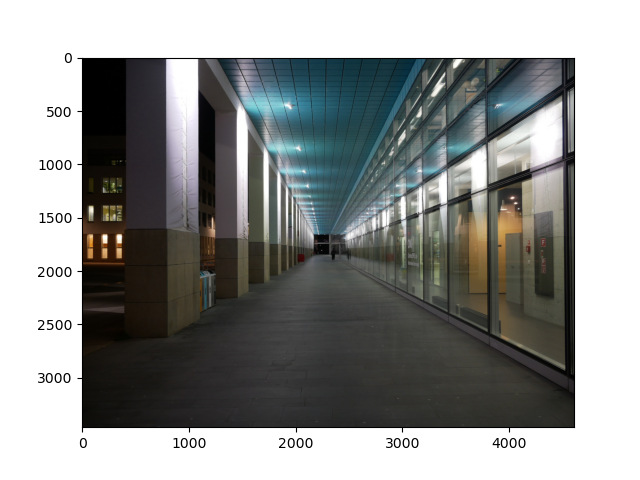

In [2]:
digital_img = DigitalImage("dataset\digital\P1480512.RW2", 2)
plt.figure()
plt.imshow(digital_img.thumbnail)

## Apply Halation

In [3]:
# Todo Halation
halated = digital_img.raw

## Apply Color Transfer Function

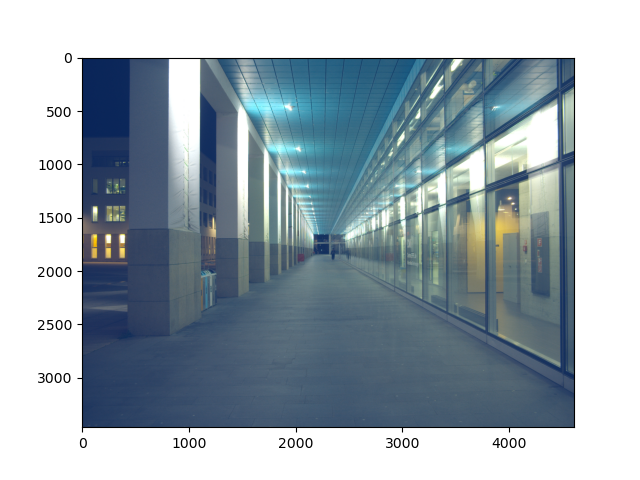

In [9]:
# import color transfer function
bluelight_ctf = ColorTransfer.load("color_transfer_data/transfer_functions/bluelight.ctf")

# import linearization function
bluelight_lfn = LinearExponential.load("color_transfer_data/linearization_functions/bluelight.lfn")

# should take around 15s
transferred = bluelight_ctf.apply(halated, bluelight_lfn.apply_inv)

plt.figure()
plt.imshow(transferred)

## Add grain

In [12]:
# Todo grain
grained = transferred

## Save image

In [13]:
path = "out.png"
Image.fromarray(np.uint8(grained*255)).save(path)